In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df = city_data_df.drop_duplicates('city')

# Combine the data into a single dataset
combined_df = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

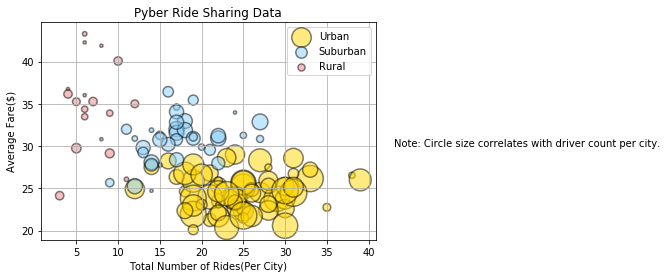

In [3]:
#Y Coordinate - Average fare per city
average_fare = combined_df.groupby("city")["fare"].mean()

#X Coordinate - Total number of rides per city
total_rides = combined_df.groupby("city")["ride_id"].count()

#S-size - Determine the size of the datapoints - Total drivers per city
total_drivers = combined_df.groupby("city")["driver_count"].mean()

#Datapoints - City Type
city_type = city_data_df.set_index("city")["type"]

#New DF to build scatterplot
cities_df = pd.DataFrame({"Average Fare":average_fare,
                 "Total Number of Rides": total_rides,
                 "Total Number of Drivers": total_drivers,
                 "City Type": city_type
})
cities_df.head()

#Filter by Urban
urban = cities_df.loc[cities_df["City Type"]== "Urban"]

#Filter by Suburban
suburban = cities_df.loc[cities_df["City Type"]== "Suburban"]

#Filter by Rural
rural = cities_df.loc[cities_df["City Type"]== "Rural"]

#Build Scatterplot
#Urban
plt.scatter(urban["Total Number of Rides"], urban["Average Fare"], color = "gold", edgecolors="black", s = urban["Total Number of Drivers"]*10, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Total Number of Rides"], suburban["Average Fare"], color = "lightskyblue", edgecolors ="black", s = suburban["Total Number of Drivers"]*10, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Total Number of Rides"], rural["Average Fare"], color = "lightcoral", edgecolors = "black", s = rural["Total Number of Drivers"]*10, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.text(43, 30,"Note: Circle size correlates with driver count per city.")

#Add the legend
plt.legend(loc="best")
plt.grid()
plt.show()

## Total Fares by City Type

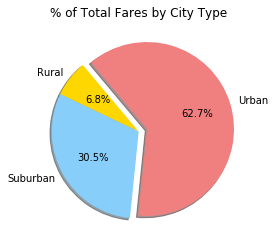

In [4]:
# Calculate Type Percents
#Total fares by city type
city_fare_pie = combined_df.groupby(["type"])["fare"].sum()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Explode the urban section of the pie chart
explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 130)

plt.title("% of Total Fares by City Type")
plt.show()


## Total Rides by City Type

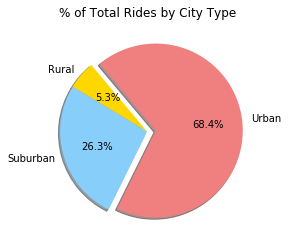

In [81]:
# Calculate Ride Percents
#Rides by City Type
city_rides_pie = combined_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Explode the urban section of the pie chart
explode = (0,0,0.1)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 130)

plt.title("% of Total Rides by City Type")
plt.show()


## Total Drivers by City Type

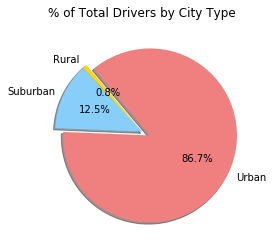

In [86]:
# Calculate Driver Percents
#Drivers by City Type
city_drivers_pie = combined_df.groupby(["type"])["driver_count"].sum()

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Explode the urban section of the pie chart
explode = (0,0,0.1)

#Create the pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 130)

plt.title("% of Total Drivers by City Type")
plt.show()
